## Question: Will designing a new web page increase the number of purchases per visit?
***Disclaimer:*** The **README** for this data set **did not** describe *how* the groups were split.

### Two versions:
For the experiment the population was split into approximately two large samples. One group, **the control group** was shown   the *old* web page. The other group, **the test group** was shown the *new* web page.

### The Samples:
The sample sizes are sufficiently large and roughly equal in size. 

### Hypothesis: 
Customers directed to the new web page will make more purchases when compared to customers directed to the old web page.

### The Null Hypothesis:
There will be no difference in the conversion rate between customers shown the old web page versus the new web page.

### Outcomes:
The success of the experiment will be made by calculating the conversion rate between the two groups. At a ***p-vlaue of 0.05*** we will reject the **Null Hypothesis**. 

### Other measured variables:
You may discover that using ***both websites at specific times*** improves business, or that ***certain products benefit from the new design and other products are better suited to the old design***. You may find that it makes sense to have more than one website altogether.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ab = pd.read_csv('C:\\ab_data.csv')
ab.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [3]:
ab.isna().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [4]:
ab.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [5]:
ab['timestamp']=pd.to_datetime(ab['timestamp'])

In [6]:
print(ab.groupby('group').count().mean(level=0))

      


           user_id  timestamp  landing_page  converted
group                                                 
control     147202     147202        147202     147202
treatment   147276     147276        147276     147276


In [7]:
print(ab.groupby('group')['converted'].mean())

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64


In [8]:
ab['group2'] = pd.Series(np.where(ab.group.values == 'control',0,1), ab.index)


In [9]:
ab['date'] = ab['timestamp'].dt.date

In [10]:
print('Experiment Duration:', ab['date'].max() - ab['date'].min())

Experiment Duration: 22 days, 0:00:00


In [11]:
ab.head(3)

,user_id,timestamp,group,landing_page,converted,group2,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,2017-01-11


In [12]:
stats.ttest_ind(ab[ab.converted == 1].group2,
               ab[ab.converted == 0].group2)

Ttest_indResult(statistic=-1.2369207675839597, pvalue=0.2161174856249009)

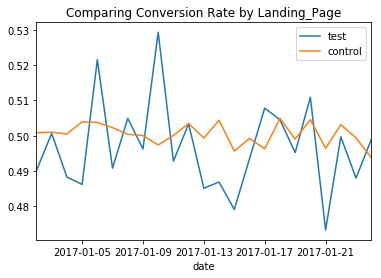

In [13]:
fig = ab[ab.converted==1][['date', 'group2']].groupby('date').mean().plot()
ab[ab.converted==0][['date','group2']].groupby('date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Conversion Rate by Landing_Page')
plt.show()

## The Results
According to the results of this experiment, we would ***reject*** the **Null Hypothesis** because our ttest shows a p-value of ***0.2161174856249009*** which is too high for us to conclude any difference between the test and control group **was not due to chance**.

## Evaluation and Takeaways 
There are a lot of details we don't know about how this experiment was conducted the first time. Was there one large group that was split in half, completely randomly? What types of considerations were given to the timing of the experiment, the time of year, specifically? The experiment was only run for 22 days, is that long enough to identify whether or not the new web page would have a positive, significant impact?

Judging by the line chart above, it appears the new web page drastically increased conversion volatility. Depending on the day, visitors were either more or less likely to convert when visiting the new web page. The new web page is having ***some kind of impact*** but we can't tell what it is. This could mean there is a variable, or a few variables, that are unaccounted for in the experiment design.

We need to re-deploy the experiment in a way that reduces the number of unaccounted variables that could influence the experiment.So that we can better gauge if the new web page is consistently increasing customer conversion rates.

## Experiment Redisgn

### Two Versions:
The control version is the old web page. The test version is the new web page design.
### Sample:
***Before*** splitting your customer population into samples get a **three month baseline of customer behavior** identify and tag the customers based on conversion rate.From the baseline establish a number that separates high converters from low converters, then tag every customer observed in that three month period with a label of either high, or low. ***Now***, randomly redirect half of your websites visitors to the new web page, but make sure the groups are **evenly** mixed between high and low converters.

Be sure to be mindful of possible differences in customer shopping behavior based on the time of day they visit your web page and the locations they reside. Time of year, and regional differences could impact how certain customers interact with your web pages.

### Hypothesis: 
Customers directed to the new web page will make more purchases when compared to customers directed to the old web page.

### The Null Hypothesis:
There will be no difference in the conversion rate between customers shown the old web page versus the new web page.

### Outcomes:
The success of the experiment will be made by calculating the conversion rate between the two groups. At a ***p-vlaue of 0.05*** we will reject the **Null Hypothesis**. 

### Other measured variables:
You may discover that using ***both websites at specific times*** improves business, or that ***certain products benefit from the new design and other products are better suited to the old design***. You may find that it makes sense to have more than one web page altogether.